# Practical example

## Importing the relevant libraries

In [992]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [993]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [994]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,nan,6,nan,nan,4,2,nan,312
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,936,nan,1649,nan,nan,2019,3947,nan,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [995]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,936,nan,1649,nan,nan,2019,3947,nan
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Dealing with missing values

In [996]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [997]:
data_no_mv = data.dropna(axis=0)

In [998]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,880,nan,1534,nan,nan,1861,3654,nan
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Exploring the PDFs

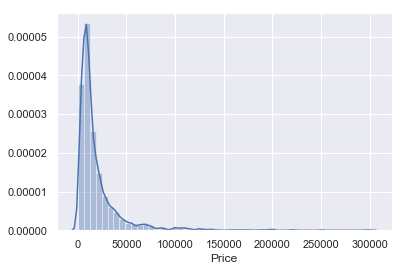

In [999]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [1000]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,880,nan,1528,nan,nan,1853,3613,nan
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


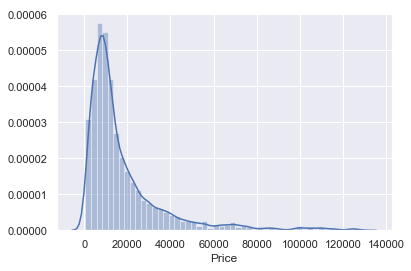

In [1001]:
sns.distplot(data_1['Price'])

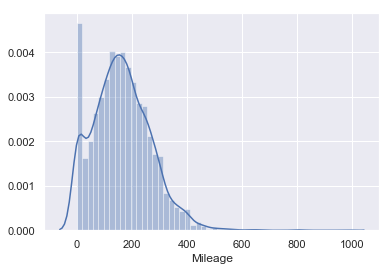

In [1002]:
sns.distplot(data_no_mv['Mileage'])

In [1003]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

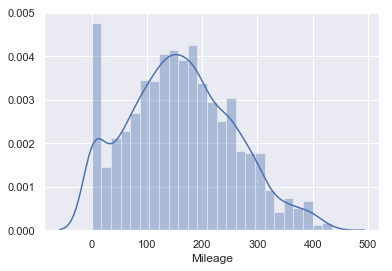

In [1004]:
sns.distplot(data_2['Mileage'])

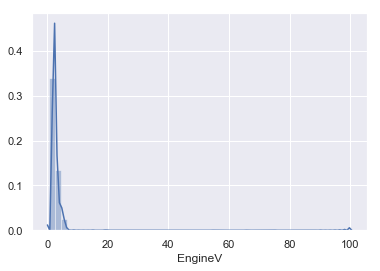

In [1005]:
sns.distplot(data_no_mv['EngineV'])

In [1006]:
data_3 = data_2[data_2['EngineV']<6.5]

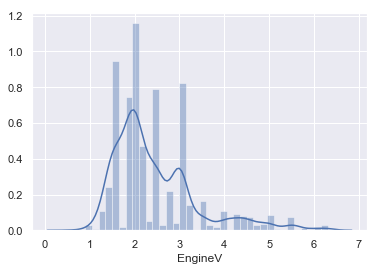

In [1007]:
sns.distplot(data_3['EngineV'])

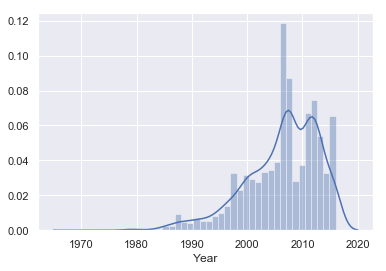

In [1008]:
sns.distplot(data_no_mv['Year'])

In [1009]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

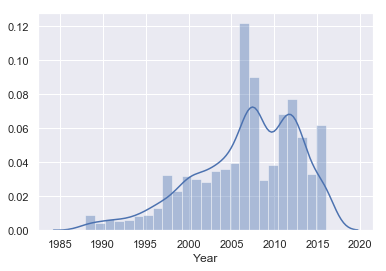

In [1010]:
sns.distplot(data_4['Year'])

In [1011]:
data_cleaned = data_4.reset_index(drop=True)

In [1012]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,848,nan,1467,nan,nan,1807,3505,nan
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


## Checking the OLS assumptions

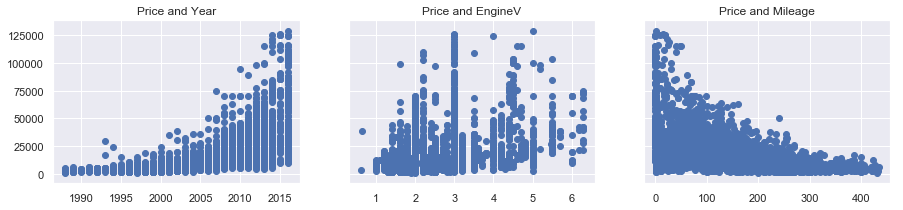

In [1013]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

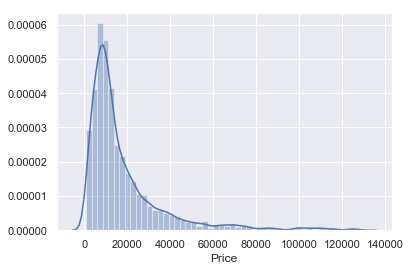

In [1014]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [1015]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
5,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
6,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,9.29
7,Volkswagen,1400.00,other,212,1.80,Gas,no,1999,7.24
8,Renault,11950.00,vagon,177,1.50,Diesel,yes,2011,9.39
9,Renault,2500.00,sedan,260,1.79,Petrol,yes,1994,7.82


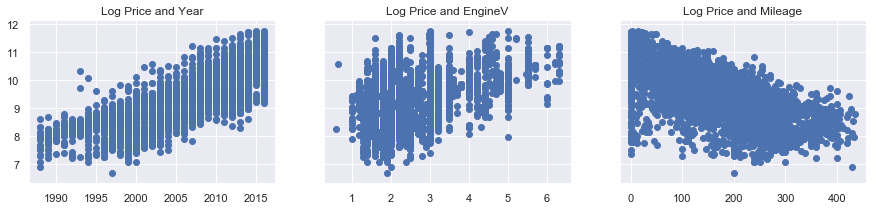

In [1016]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [1017]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [1018]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [1019]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [1020]:
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [1021]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [1022]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [1023]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [1024]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [1025]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [1026]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [1027]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [1028]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [1029]:
inputs_scaled = scaler.transform(inputs)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Train Test Split

In [1030]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [1031]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1032]:
y_hat = reg.predict(x_train)

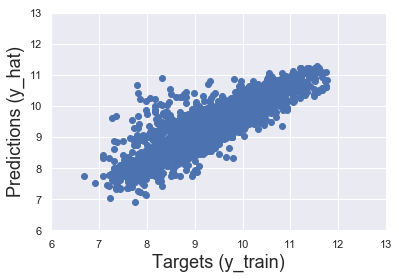

In [1033]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

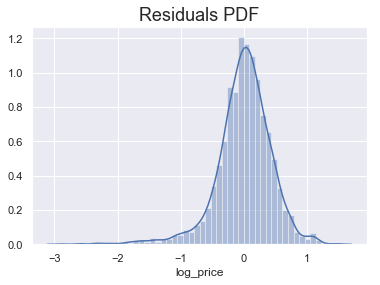

In [1034]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [1035]:
reg.score(x_train,y_train)

0.744996578792662

### Finding the weights and bias

In [1036]:
reg.intercept_

9.415239458021299

In [1037]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [1038]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


In [1039]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [1040]:
y_hat_test = reg.predict(x_test)

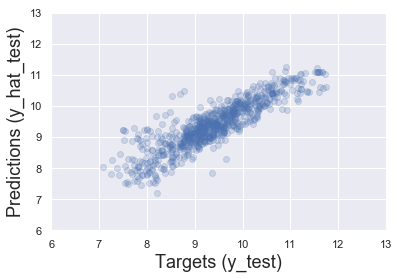

In [1041]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [1042]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49


In [1043]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.50,nan
1,3499.26,7900.00
2,7553.29,nan
3,7463.96,nan
4,11353.49,nan
5,21289.80,14200.00
6,20159.19,nan
7,20349.62,nan
8,11581.54,11950.00
9,33614.62,nan


In [1044]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [1045]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00
5,21289.80,20000.00
6,20159.19,38888.00
7,20349.62,16999.00
8,11581.54,12500.00
9,33614.62,41000.00


In [1046]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [1047]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08
5,21289.80,20000.00,-1289.80,6.45
6,20159.19,38888.00,18728.81,48.16
7,20349.62,16999.00,-3350.62,19.71
8,11581.54,12500.00,918.46,7.35
9,33614.62,41000.00,7385.38,18.01


In [1048]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,15946.76,18165.82,2219.06,36.26
std,13133.20,19967.86,10871.22,55.07
min,1320.56,1200.00,-29456.50,0.06
25%,7413.64,6900.00,-2044.19,12.11
50%,11568.17,11600.00,142.52,23.47
75%,20162.41,20500.00,3147.34,39.56
max,77403.06,126000.00,85106.16,512.69


In [1049]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


# From here my additions

## Look at various brand and model types ordered to get a feel if there is a pattern, if some types appear more etc.

In [1050]:
raw_data[['Brand','Model']].sort_values(by=['Brand','Model'])

,Brand,Model
30,Audi,100
354,Audi,100
682,Audi,100
736,Audi,100
1177,Audi,100
1462,Audi,100
1517,Audi,100
1807,Audi,100
1817,Audi,100
2032,Audi,100


Conclusion - don't see a pattern in values - a lot of values appear many times, no clear families, doesn't look there are spelling errors

## Look if biggest errors are in specific brands

Check if the make of the biggest differences are of a specific brand to decide if perhaps to add a Model only for specific brand

In [1051]:
x_test_df = pd.DataFrame(data=x_test, columns=inputs.columns.values)
x_test_df
x_test_df.columns.values
x_test_df[['Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen']]
df_pf[['Brand_BMW', 'Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen']]=x_test_df[['Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen']]
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
698,30480.85,30500.00,19.15,0.06,-0.44,-0.49,-0.29,-0.35,2.60,-0.53
742,16960.31,16999.00,38.69,0.23,-0.44,-0.49,-0.29,-0.35,2.60,-0.53
60,12469.21,12500.00,30.79,0.25,-0.44,-0.49,-0.29,-0.35,-0.38,1.89
110,25614.14,25500.00,-114.14,0.45,2.28,-0.49,-0.29,-0.35,-0.38,-0.53
367,42703.68,42500.00,-203.68,0.48,2.28,-0.49,-0.29,-0.35,-0.38,-0.53
369,3084.69,3100.00,15.31,0.49,-0.44,-0.49,-0.29,-0.35,-0.38,1.89
769,29651.73,29500.00,-151.73,0.51,-0.44,2.03,-0.29,-0.35,-0.38,-0.53
272,9749.53,9800.00,50.47,0.52,-0.44,-0.49,-0.29,-0.35,2.60,-0.53
714,23118.07,22999.00,-119.07,0.52,-0.44,-0.49,-0.29,-0.35,2.60,-0.53
630,8734.58,8800.00,65.42,0.74,-0.44,-0.49,-0.29,-0.35,-0.38,1.89


Conclusion - although format is not very user friendly, it looks like a lot of brands appear with the biggest differences.

## Add Model as is

#### Remove Null values:

In [1052]:
data_with_model = raw_data.dropna(axis=0)
data_with_model.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00,4025
unique,7,nan,6,nan,nan,4,2,nan,306
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,880,nan,1534,nan,nan,1861,3654,nan,188
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38,NaN
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


#### Dealing with outliers:

In [1053]:
q = data_with_model['Price'].quantile(0.99)
data_1_with_model = data_with_model[data_with_model['Price']<q]
data_1_with_model.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00,3984
unique,7,nan,6,nan,nan,4,2,nan,302
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,880,nan,1528,nan,nan,1853,3613,nan,188
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29,NaN
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75,NaN
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00,NaN


In [1054]:
q = data_1_with_model['Mileage'].quantile(0.99)
data_2_with_model = data_1_with_model[data_1_with_model['Mileage']<q]

data_3_with_model = data_2_with_model[data_2_with_model['EngineV']<6.5]

q = data_3_with_model['Year'].quantile(0.01)
data_4_with_model = data_3_with_model[data_3_with_model['Year']>q]

data_cleaned_with_model = data_4_with_model.reset_index(drop=True)
data_cleaned_with_model.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,nan,6,nan,nan,4,2,nan,291
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,848,nan,1467,nan,nan,1807,3505,nan,181
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71,NaN
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00,NaN


#### Performing Log of price:

In [1055]:
log_price_with_model = np.log(data_cleaned_with_model['Price'])
data_cleaned_with_model['log_price'] = log_price_with_model
data_cleaned_with_model = data_cleaned_with_model.drop(['Price'],axis=1)
data_cleaned_with_model

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.00,Petrol,yes,1991,320,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,1999,Sprinter 212,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003,S 500,9.50
3,Audi,crossover,240,4.20,Petrol,yes,2007,Q7,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,2011,Rav 4,9.81
5,Audi,vagon,200,2.70,Diesel,yes,2006,A6,9.56
6,Renault,vagon,193,1.50,Diesel,yes,2012,Megane,9.29
7,Volkswagen,other,212,1.80,Gas,no,1999,Golf IV,7.24
8,Renault,vagon,177,1.50,Diesel,yes,2011,Megane,9.39
9,Renault,sedan,260,1.79,Petrol,yes,1994,19,7.82


#### Remove Year because of multicollinearity:

In [1056]:
data_cleaned_with_model = data_cleaned_with_model.drop(['Year'],axis=1)
data_cleaned_with_model

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,2.00,Petrol,yes,320,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,Sprinter 212,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,S 500,9.50
3,Audi,crossover,240,4.20,Petrol,yes,Q7,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,Rav 4,9.81
5,Audi,vagon,200,2.70,Diesel,yes,A6,9.56
6,Renault,vagon,193,1.50,Diesel,yes,Megane,9.29
7,Volkswagen,other,212,1.80,Gas,no,Golf IV,7.24
8,Renault,vagon,177,1.50,Diesel,yes,Megane,9.39
9,Renault,sedan,260,1.79,Petrol,yes,19,7.82


#### Create dummy variables:

In [1057]:
data_with_dummies_with_model = pd.get_dummies(data_cleaned_with_model, drop_first=True)
data_with_dummies_with_model.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Perform regression - prepare variables:

In [1058]:
targets_with_model = data_with_dummies_with_model['log_price']
inputs_with_model = data_with_dummies_with_model.drop(['log_price'],axis=1)

#### Perform regression - scale the data:

In [1059]:
scaler_with_model = StandardScaler()
scaler_with_model.fit(inputs_with_model)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [1060]:
inputs_scaled_with_model = scaler_with_model.transform(inputs_with_model)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


#### Train Test Split:

In [1061]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(inputs_scaled_with_model, targets_with_model, test_size=0.2, random_state=365)

#### Perform regression:

In [1062]:
reg_m = LinearRegression()
reg_m.fit(x_train_m, y_train_m)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

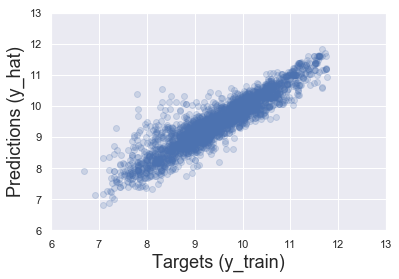

In [1063]:
y_hat_m = reg_m.predict(x_train_m)
plt.scatter(y_train_m, y_hat_m, alpha=0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

*Conclusion*: Scatterplot seems better than before

Text(0.5, 1.0, 'Residuals PDF')

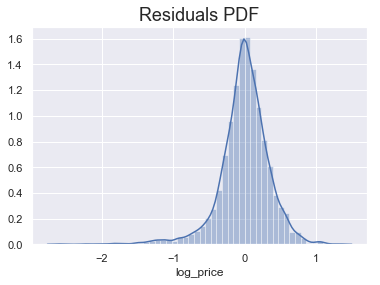

In [1064]:
sns.distplot(y_train_m - y_hat_m)
plt.title("Residuals PDF", size=18)

*Conclusion*: Distribution is much better than before, much thinner and shorter tails

In [1065]:
reg_m.score(x_train_m,y_train_m)

0.8399990143138187

*Conclusion:* R2 is much better than without model (without model was 0.74)

#### Finding weights and bias:

In [1066]:
reg_m.intercept_

281186312960.61414

In [1067]:
data_cleaned_with_model.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model', 'log_price'], dtype=object)

In [1068]:
reg_summary_m = pd.DataFrame(inputs_with_model.columns.values, columns=['Features'])
reg_summary_m['Weights'] = reg_m.coef_
reg_summary_m

,Features,Weights
0,Mileage,-0.36
1,EngineV,0.03
2,Brand_BMW,-975873611964.75
3,Brand_Mercedes-Benz,-1051528566364.98
4,Brand_Mitsubishi,-3008579813658.66
5,Brand_Renault,5340941501881.08
6,Brand_Toyota,-1598151807874.03
7,Brand_Volkswagen,3366585197475.19
8,Body_hatch,-0.06
9,Body_other,-0.02


### Conclusions:
It seems that:
1. Engine barely has effect (0.03) - can be possibly removed
2. Mileage has large effect (-0.36)
3. Registration large effect (0.31 compared to the alternative)
4. Body some effect (~0.02-0.07) - can be possibly removed 5. Engine Type some effect (up to 0.12)
3. Brand and Model seem to have a huge effect

#### Testing:

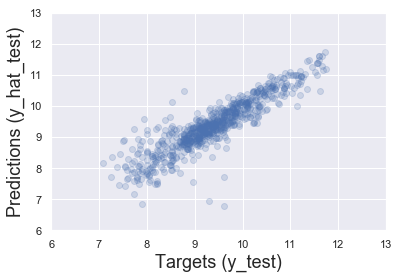

In [1069]:
y_hat_test_m = reg_m.predict(x_test_m)
plt.scatter(y_test_m, y_hat_test_m, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

*Conclusion:* Looks better than before, less scattered

In [1070]:
y_test_m = y_test_m.reset_index(drop=True)
df_pf_m = pd.DataFrame(np.exp(y_hat_test_m), columns=['Prediction'])
df_pf_m['Target'] = np.exp(y_test_m)
df_pf_m['Residual'] = df_pf_m['Target'] - df_pf_m['Prediction']
df_pf_m['Difference%'] = np.absolute(df_pf_m['Residual']/df_pf_m['Target']*100)
df_pf_m

,Prediction,Target,Residual,Difference%
0,10433.82,2300.00,-8133.82,353.64
1,inf,2800.00,-inf,inf
2,4861.66,2500.00,-2361.66,94.47
3,7129.16,6400.00,-729.16,11.39
4,11457.91,9150.00,-2307.91,25.22
5,0.00,20000.00,20000.00,100.00
6,inf,38888.00,-inf,inf
7,12596.35,16999.00,4402.65,25.90
8,12068.03,12500.00,431.97,3.46
9,41382.58,41000.00,-382.58,0.93


**Warning!!!** Some values it didn't know how to predict

In [1071]:
df_pf_m.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,inf,18165.82,-inf,inf
std,nan,19967.86,nan,nan
min,0.00,1200.00,-inf,0.07
25%,7138.53,6900.00,-1978.70,8.67
50%,11384.02,11600.00,139.96,19.61
75%,20392.30,20500.00,2267.14,36.24
max,inf,126000.00,76133.86,inf


***Bottom line*** - doesn't know how to deal with extreme values, when dealing with numbers in the middle, usually deals better with